## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
x,y,z = sp.symbols("x y z")

In [3]:
formula = sp.sin(5*x) * sp.cos(5*y) / 5

In [4]:
display(sp.Derivative(formula,x))

Derivative(sin(5*x)*cos(5*y)/5, x)

## Differentiate

In [5]:
formula_dx = sp.diff(formula, x)
formula_dy = sp.diff(formula, y)
f = sp.lambdify((x,y),formula)
f_dx = sp.lambdify((x,y), formula_dx)
f_dy = sp.lambdify((x,y), formula_dy)

In [6]:
# Set graph vals
x_vals = np.arange(-1,1,0.05)
y_vals = np.arange(-1,1,0.05)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X,Y)

In [7]:
# Set current vals
c_x = .33
c_y = .1
current_position = (c_x,c_y,f(c_x,c_y))
print(current_position)

(0.33, 0.1, 0.1749662731059019)


In [8]:
# Helper Functions

tan_plane = np.array([])

def plane_eq(X,Y,c_pos,mx,my):
    return (c_pos[2] + mx * (X-c_pos[0]) + my * (Y-c_pos[1]))

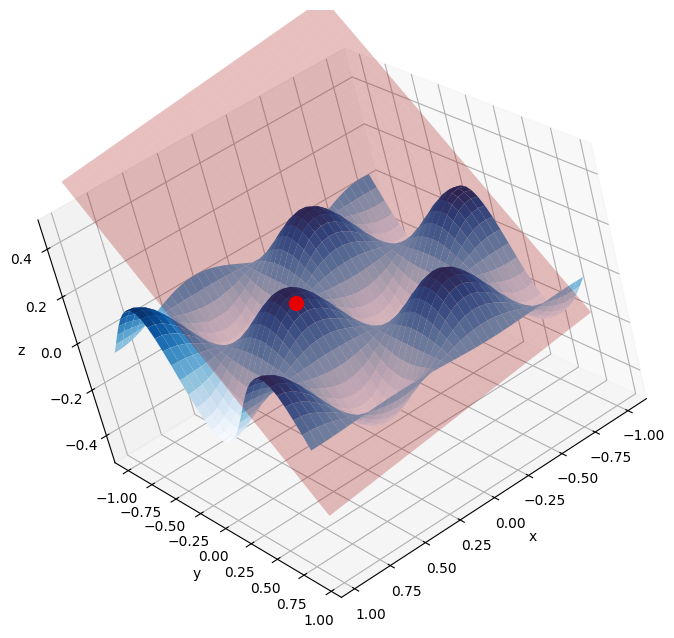

In [9]:
# Make big chart

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d", computed_zorder=False)

ax.view_init(elev=30,azim=60,roll=15)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_zlim(-.5,.5)

ax.plot_surface(X,Y,Z, cmap="Blues",zorder=0)
ax.scatter(current_position[0],current_position[1],current_position[2],color="r",zorder=1,s=100)

tan_plane = plane_eq(X,Y,current_position,f_dx(current_position[0],current_position[1]),f_dy(current_position[0],current_position[1]))
ax.plot_surface(X,Y,tan_plane,color="r",alpha=0.25,zorder=1)

plt.show()


In [10]:
type(Z)

numpy.ndarray

In [11]:
tan_plane = plane_eq(X,Y,current_position,f_dx(current_position[0],current_position[1]),f_dy(current_position[0],current_position[1]))
ax.plot_surface(X,Y,tan_plane,color="r",alpha=0.25,zorder=1)

plt.show()
print(tan_plane)

[[ 0.79302978  0.78955803  0.78608627 ...  0.66457482  0.66110307
   0.65763131]
 [ 0.76913365  0.7656619   0.76219014 ...  0.6406787   0.63720694
   0.63373518]
 [ 0.74523753  0.74176577  0.73829401 ...  0.61678257  0.61331081
   0.60983906]
 ...
 [-0.09112694 -0.0945987  -0.09807045 ... -0.2195819  -0.22305366
  -0.22652541]
 [-0.11502307 -0.11849483 -0.12196658 ... -0.24347803 -0.24694978
  -0.25042154]
 [-0.1389192  -0.14239095 -0.14586271 ... -0.26737416 -0.27084591
  -0.27431767]]


## Graph it and build animation

### Learning Rate

In [12]:
learning_rate = .01
epsilon = 0.05

### Current Position

In [13]:
c_x = .33
c_y = .1
current_position = (c_x,c_y,f(c_x,c_y))
print(current_position)

(0.33, 0.1, 0.1749662731059019)


### Remove old files

In [14]:
# Remove old files
!rm img/*.png
!rm gradient_descent.gif

### Build frames

In [15]:
i=0
while(np.abs(f_dx(current_position[0],current_position[1])) > epsilon or np.abs(f_dy(current_position[0],current_position[1])) > epsilon):
    new_x = current_position[0] - learning_rate * f_dx(current_position[0],current_position[1])
    new_y = current_position[1] - learning_rate * f_dy(current_position[0],current_position[1])
    current_position = (new_x,new_y,f(new_x,new_y))

    fig = plt.figure(figsize=(6,6),layout="tight")
    fig.suptitle("Gradient Descent")
    ax = fig.add_subplot(projection="3d", computed_zorder=False)
    ax.view_init(elev=30,azim=60,roll=15)

    #cx,cy = current_position
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_zlim(-.5,.5)
    
    ax.plot_surface(X,Y,Z, cmap="Blues",zorder=0)
    ax.scatter(current_position[0],current_position[1],current_position[2],color="r",zorder=1,s=100)

    tan_plane = plane_eq(X,Y,current_position,f_dx(current_position[0],current_position[1]),f_dy(current_position[0],current_position[1]))
    ax.plot_surface(X,Y,tan_plane,color="r",alpha=0.25,zorder=1)
    
    plt.savefig(f'img/{i:005}',dpi=100,facecolor='white')
    plt.close()
    i+=1

In [16]:
## Use imagemacik convert to build animation

In [17]:
!convert -delay 5 img/*.png gradient_descent.gif